# 데이터분석 경진대회 (JB사냥개들)

##  목차  
## [1. 데이터 파악](#s-1) 
+ [1.1 데이터 및 패키지 불러오기](#s-1.1)    
+ [1.2 데이터 컬럼 정보](#s-1.2)   
+ [1.3 데이터 결측값, 이상값 확인](#s-1.3)     
+ [1.4 이상값 및 결측값 -> 결측치 처리](#s-1.4)     
+ [1.5 결측치 간 패턴 등 연관성 파악](#s-1.5)   
+ [1.6 결측치 대체(추정통계량대체)](#s-1.6)    

## 2. 데이터 시각화

## 3. Feature Enginnering  

## 4. Modeling


test completed

## 1. 데이터 파악  <a id="s-1">

### 1-1. 데이터 및 패키지 불러오기 <a id="s-1.1">

- #### 디렉토리 설정 및 Raw Data 불러오기

In [76]:
import pandas as pd
import numpy as np
from scipy import stats
import os
import seaborn as sns
import matplotlib.pyplot as plt

path = "/Users/apple/Desktop/jbfg_ds_2nd/"
os.chdir(path)

In [5]:
df = pd.read_csv('loan_customer.csv')

In [6]:
pd.set_option('display.max_columns',None)
df.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,REGION_RATING_CLIENT,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,CB_SCORE_1,CB_SCORE_2,CB_SCORE_3,TARGET
0,100002,Cash loans,M,Y,0,202500.0,NaN,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461.0,-637.0,-3648.0,-2120.0,1,1,0,1,0,2,WEDNESDAY,10,0,0,0,Business Entity Type 3,0,1,0,NaN,NaN,58.349224,1
1,100004,Revolving loans,NaN,NaN,0,67500.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,NaN,-19046.0,NaN,-4260.0,-2531.0,1,1,1,1,0,2,MONDAY,9,0,0,0,Government,0,0,0,26.499494,57.600542,46.433666,0
2,100020,Cash loans,M,N,0,108000.0,509602.5,Working,Secondary / secondary special,Married,House / apartment,0.018634,-12931.0,NaN,NaN,-3866.0,1,1,0,0,0,2,THURSDAY,12,1,1,0,Government,0,1,0,NaN,63.496369,NaN,0
3,100029,Cash loans,M,N,2,135000.0,NaN,Working,Secondary / secondary special,Married,House / apartment,0.026392,-11286.0,-746.0,-108.0,NaN,1,1,0,0,0,2,THURSDAY,14,0,1,1,Business Entity Type 3,0,1,0,82.376245,45.996152,68.694333,0
4,100048,Cash loans,NaN,Y,0,202500.0,604152.0,Working,Secondary / secondary special,Married,House / apartment,0.009175,NaN,-475.0,NaN,-513.0,1,1,0,1,0,2,MONDAY,12,0,1,1,Industry: type 1,0,1,0,66.199985,NaN,NaN,0


### 1-2. 데이터 컬럼 정보 <a id="s-1.2">

- #### 원활한 데이터 처리를 위해 컬럼정보(한글명)를 참고 활용 (지주 제공 ppt참고)

In [106]:
column_info = {'SK_ID_CURR':'대출식별번호',
'NAME_CONTRACT_TYPE':'계약유형',
'CODE_GENDER':'성별',
'FLAG_OWN_REALTY':'자가부동산보유여부',
'CNT_CHILDREN':'자녀수',
'AMT_INCOME_TOTAL':'소득금액(USD)',
'AMT_CREDIT':'신용대출금액(USD)',
'NAME_INCOME_TYPE':'소득유형',
'NAME_EDUCATION_TYPE':'학력',
'NAME_FAMILY_STATUS':'결혼상태',
'NAME_HOUSING_TYPE':'주거형태',
'REGION_POPULATION_RELATIVE':'거주지역의표준화된인구',
'DAYS_BIRTH':'대출신청시점에서의일단위나이(기준시점대비상대적인시간)',
'DAYS_EMPLOYED':'대출신청시점에서의고객의근무일수(기준시점대비상대적인시간)',
'DAYS_REGISTRATION':'대출신청이전에고객이등록정보를변경한시점사이의일수(기준시점대비상대적인시간)',
'DAYS_ID_PUBLISH':'대출신청이전에고객이신분증을변경한시점사이의일수(기준시점대비상대적인시간)',
'FLAG_MOBIL':'휴대폰번호등록여부',
'FLAG_EMP_PHONE':'고용주연락처등록여부',
'FLAG_WORK_PHONE':'직장전화번호등록여부',
'FLAG_PHONE':'집전화번호등록여부',
'FLAG_EMAIL':'이메일주소등록여부',
'REGION_RATING_CLIENT':'거주지등급',
'WEEKDAY_APPR_PROCESS_START':'대출신청요일',
'HOUR_APPR_PROCESS_START':'대출신청시간대',
'REG_CITY_NOT_LIVE_CITY':'고객의등록지주소와실거주지일치여부',
'REG_CITY_NOT_WORK_CITY':'고객의등록지주소와직장주소일치여부',
'LIVE_CITY_NOT_WORK_CITY':'고객의실거주지와직장주소일치여부',
'ORGANIZATION_TYPE':'근무회사유형',
'FLAG_DOCUMENT_2':'문서2제공여부',
'FLAG_DOCUMENT_3':'문서3제공여부',
'FLAG_DOCUMENT_4':'문서4제공여부',
'CB_SCORE_1':'신용점수1',
'CB_SCORE_2':'신용점수2',
'CB_SCORE_3':'신용점수3',
'TARGET':'연체여부'}

In [16]:

df_colinfo = df.copy() 

for col in df_colinfo.columns : 
    df_colinfo.rename(columns = {col:column_info[col]}, inplace = True)
    print(col+'컬럼의 이름을 '+column_info[col]+'로 수정했습니다 ')

SK_ID_CURR컬럼의 이름을 대출식별번호로 수정했습니다 
NAME_CONTRACT_TYPE컬럼의 이름을 계약유형로 수정했습니다 
CODE_GENDER컬럼의 이름을 성별로 수정했습니다 
FLAG_OWN_REALTY컬럼의 이름을 자가부동산보유여부로 수정했습니다 
CNT_CHILDREN컬럼의 이름을 자녀수로 수정했습니다 
AMT_INCOME_TOTAL컬럼의 이름을 소득금액(USD)로 수정했습니다 
AMT_CREDIT컬럼의 이름을 신용대출금액(USD)로 수정했습니다 
NAME_INCOME_TYPE컬럼의 이름을 소득유형로 수정했습니다 
NAME_EDUCATION_TYPE컬럼의 이름을 학력로 수정했습니다 
NAME_FAMILY_STATUS컬럼의 이름을 결혼상태로 수정했습니다 
NAME_HOUSING_TYPE컬럼의 이름을 주거형태로 수정했습니다 
REGION_POPULATION_RELATIVE컬럼의 이름을 거주지역의표준화된인구로 수정했습니다 
DAYS_BIRTH컬럼의 이름을 대출신청시점에서의일단위나이(기준시점대비상대적인시간)로 수정했습니다 
DAYS_EMPLOYED컬럼의 이름을 대출신청시점에서의고객의근무일수(기준시점대비상대적인시간)로 수정했습니다 
DAYS_REGISTRATION컬럼의 이름을 대출신청이전에고객이등록정보를변경한시점사이의일수(기준시점대비상대적인시간)로 수정했습니다 
DAYS_ID_PUBLISH컬럼의 이름을 대출신청이전에고객이신분증을변경한시점사이의일수(기준시점대비상대적인시간)로 수정했습니다 
FLAG_MOBIL컬럼의 이름을 휴대폰번호등록여부로 수정했습니다 
FLAG_EMP_PHONE컬럼의 이름을 고용주연락처등록여부로 수정했습니다 
FLAG_WORK_PHONE컬럼의 이름을 직장전화번호등록여부로 수정했습니다 
FLAG_PHONE컬럼의 이름을 집전화번호등록여부로 수정했습니다 
FLAG_EMAIL컬럼의 이름을 이메일주소등록여부로 수정했습니다 
REGION_RATING_CLIENT컬럼의 이름을 거주지등급로 수정했습니다 
WEEKDAY_APPR_PROCESS_START

### 1-3. 데이터 결측값, 이상값 확인  <a id="s-1.3">

- #### 각 컬럼별 데이터 유형 및 결측치 확인 

In [57]:
df_colinfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24000 entries, 0 to 23999
Data columns (total 35 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   대출식별번호                                   24000 non-null  int64  
 1   계약유형                                     24000 non-null  object 
 2   성별                                       16906 non-null  object 
 3   자가부동산보유여부                                14429 non-null  object 
 4   자녀수                                      24000 non-null  int64  
 5   소득금액(USD)                                24000 non-null  float64
 6   신용대출금액(USD)                              16700 non-null  float64
 7   소득유형                                     24000 non-null  object 
 8   학력                                       24000 non-null  object 
 9   결혼상태                                     24000 non-null  object 
 10  주거형태                                     24000

> #### 데이터 유형 확인 : <font color =bluesky> 수치형 변수는 float/int, 범주형 변수는 object로 잘 들어가있는 것으로 확인됨 </font>
> #### 결측값 및 이상값 확인 : <font color =bluesky> 몇몇 컬럼에 대해 상당한 결측치가 존재함. 결측치 대체를 어떻게 하느냐가 매우 중요해 보임 </font>

- #### SK_ID_CURR 키값에 중복여부 체크 진행, 대출식별 기준으로 그룹화하고 counting

In [19]:
grouped = df.groupby('SK_ID_CURR').size()

# counting이 1 넘어간 것들만 필터링
filtered_grouped = grouped[grouped > 1]

print(filtered_grouped)

Series([], dtype: int64)


> #### SK_ID_CURR 키값에 중복여부 확인 결과 : <font color =bluesky>  모두 고유값임 </font>

- #### 각 컬럼별 유효값 확인

In [20]:
for column in df.columns:
    value_counts = df[column].value_counts(dropna = False)
    print(f"Value counts for {column} {column_info[column]}:\n{value_counts}\n")

Value counts for SK_ID_CURR 대출식별번호:
100002    1
337229    1
337317    1
337293    1
337288    1
         ..
218660    1
218625    1
218609    1
218594    1
456228    1
Name: SK_ID_CURR, Length: 24000, dtype: int64

Value counts for NAME_CONTRACT_TYPE 계약유형:
Cash loans         21733
Revolving loans     2267
Name: NAME_CONTRACT_TYPE, dtype: int64

Value counts for CODE_GENDER 성별:
F      11211
NaN     7094
M       5694
XNA        1
Name: CODE_GENDER, dtype: int64

Value counts for FLAG_OWN_REALTY 자가부동산보유여부:
Y      9939
NaN    9571
N      4490
Name: FLAG_OWN_REALTY, dtype: int64

Value counts for CNT_CHILDREN 자녀수:
0    16859
1     4703
2     2046
3      341
4       41
5        9
7        1
Name: CNT_CHILDREN, dtype: int64

Value counts for AMT_INCOME_TOTAL 소득금액(USD):
135000.0    2779
112500.0    2422
157500.0    2052
180000.0    1860
90000.0     1785
            ... 
68400.0        1
118800.0       1
183375.0       1
113008.5       1
120784.5       1
Name: AMT_INCOME_TOTAL, Length: 494, dty

> #### 이상값 및 결측값 종류 : __'NaN', 'nan', 'XNA', 'Unknown'__ <font color =bluesky> ▶ np.nan로 통일 진행 필요 </font>

### 1.4 이상값 및 결측값 -> 결측치 처리 <a id="s-1.4">

- #### 이상값 모두 결측치로 통일하여 처리

In [50]:
df_adj_mv = df.copy()
#df_adj_mv = df_adj_mv.astype(str)
df_adj_mv = df_adj_mv.replace(['NaN', 'nan', 'XNA', 'Unknown'], np.nan)

In [51]:
for column in df_adj_mv.columns:
    value_counts = df_adj_mv[column].value_counts(dropna = False)
    print(f"Value counts for {column} {column_info[column]}:\n{value_counts}\n")

Value counts for SK_ID_CURR 대출식별번호:
100002    1
337229    1
337317    1
337293    1
337288    1
         ..
218660    1
218625    1
218609    1
218594    1
456228    1
Name: SK_ID_CURR, Length: 24000, dtype: int64

Value counts for NAME_CONTRACT_TYPE 계약유형:
Cash loans         21733
Revolving loans     2267
Name: NAME_CONTRACT_TYPE, dtype: int64

Value counts for CODE_GENDER 성별:
F      11211
NaN     7095
M       5694
Name: CODE_GENDER, dtype: int64

Value counts for FLAG_OWN_REALTY 자가부동산보유여부:
Y      9939
NaN    9571
N      4490
Name: FLAG_OWN_REALTY, dtype: int64

Value counts for CNT_CHILDREN 자녀수:
0    16859
1     4703
2     2046
3      341
4       41
5        9
7        1
Name: CNT_CHILDREN, dtype: int64

Value counts for AMT_INCOME_TOTAL 소득금액(USD):
135000.0    2779
112500.0    2422
157500.0    2052
180000.0    1860
90000.0     1785
            ... 
68400.0        1
118800.0       1
183375.0       1
113008.5       1
120784.5       1
Name: AMT_INCOME_TOTAL, Length: 494, dtype: int64

Va

In [97]:
# 결측치 확인
print("결측치가 있는 행의 수는",len(df_adj_mv),"중",len(df_adj_mv[df_adj_mv.isnull().any(axis=1)]))
# 대부분의 행이 결측치가 있음
missing_values = df_adj_mv.isnull().sum()
missing_values[missing_values > 0 ]

결측치가 있는 행의 수는 24000 중 23636


CODE_GENDER                   7095
FLAG_OWN_REALTY               9571
AMT_CREDIT                    7300
NAME_FAMILY_STATUS               1
REGION_POPULATION_RELATIVE    7149
DAYS_BIRTH                    4749
DAYS_EMPLOYED                 7149
DAYS_REGISTRATION             9733
DAYS_ID_PUBLISH               4741
ORGANIZATION_TYPE             4294
CB_SCORE_1                    6146
CB_SCORE_2                    8274
CB_SCORE_3                    7108
dtype: int64

> #### 상당한 컬럼들에 결측치가 있음을 확인.   <font color =bluesky> 대부분 결측치가 있는 컬럼별로 결측치는 약 4,000 ~ 9,000개가 있으므로 20~40% 를 차지함 </font>
> #### 주어진 유효값들에 패턴에 의해 결측치가 발생된건지,   무작위 패턴으로 결측치가 있는 것인지 면밀한 확인이 필요함

###  1.5 결측치 간 패턴 등 연관성 파악 <a id="s-1.5">

- #### 최종 결측치가 있는 컬럼 파악

In [105]:
# 결측값이 있는 행 선택하기
col_mv_list = df_adj_mv.columns[df_adj_mv.isnull().any()]

for column in col_mv_list:
    print(f"- {column} {column_info[column]}")

- CODE_GENDER 성별
- FLAG_OWN_REALTY 자가부동산보유여부
- AMT_CREDIT 신용대출금액(USD)
- NAME_FAMILY_STATUS 결혼상태
- REGION_POPULATION_RELATIVE 거주지역의표준화된인구
- DAYS_BIRTH 대출신청시점에서의일단위나이(기준시점대비상대적인시간)
- DAYS_EMPLOYED 대출신청시점에서의고객의근무일수(기준시점대비상대적인시간)
- DAYS_REGISTRATION 대출신청이전에고객이등록정보를변경한시점사이의일수(기준시점대비상대적인시간)
- DAYS_ID_PUBLISH 대출신청이전에고객이신분증을변경한시점사이의일수(기준시점대비상대적인시간)
- ORGANIZATION_TYPE 근무회사유형
- CB_SCORE_1 신용점수1
- CB_SCORE_2 신용점수2
- CB_SCORE_3 신용점수3


- #### 최종 결측치가 있는 행

In [99]:
df_adj_mv2 = df_adj_mv[df_adj_mv.isnull().any(axis=1)]
df_adj_mv2

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,REGION_RATING_CLIENT,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,CB_SCORE_1,CB_SCORE_2,CB_SCORE_3,TARGET
0,100002,Cash loans,M,Y,0,202500.0,NaN,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461.0,-637.0,-3648.0,-2120.0,1,1,0,1,0,2,WEDNESDAY,10,0,0,0,Business Entity Type 3,0,1,0,NaN,NaN,58.349224,1
1,100004,Revolving loans,NaN,NaN,0,67500.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,NaN,-19046.0,NaN,-4260.0,-2531.0,1,1,1,1,0,2,MONDAY,9,0,0,0,Government,0,0,0,26.499494,57.600542,46.433666,0
2,100020,Cash loans,M,N,0,108000.0,509602.5,Working,Secondary / secondary special,Married,House / apartment,0.018634,-12931.0,NaN,NaN,-3866.0,1,1,0,0,0,2,THURSDAY,12,1,1,0,Government,0,1,0,NaN,63.496369,NaN,0
3,100029,Cash loans,M,N,2,135000.0,NaN,Working,Secondary / secondary special,Married,House / apartment,0.026392,-11286.0,-746.0,-108.0,NaN,1,1,0,0,0,2,THURSDAY,14,0,1,1,Business Entity Type 3,0,1,0,82.376245,45.996152,68.694333,0
4,100048,Cash loans,NaN,Y,0,202500.0,604152.0,Working,Secondary / secondary special,Married,House / apartment,0.009175,NaN,-475.0,NaN,-513.0,1,1,0,1,0,2,MONDAY,12,0,1,1,Industry: type 1,0,1,0,66.199985,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23995,456095,Cash loans,NaN,NaN,0,135000.0,NaN,Pensioner,Higher education,Married,House / apartment,NaN,-19105.0,365243.0,NaN,-2662.0,1,0,0,0,0,2,SUNDAY,10,0,0,0,NaN,0,1,0,55.568876,64.318198,56.609319,0
23996,456117,Cash loans,NaN,N,1,67500.0,490536.0,Working,Secondary / secondary special,Married,House / apartment,0.003813,-12183.0,NaN,-106.0,NaN,1,1,1,1,0,2,MONDAY,12,0,0,0,Business Entity Type 3,0,1,0,79.804871,NaN,51.115667,0
23997,456118,Cash loans,M,Y,0,135000.0,995643.0,Working,Higher education,Married,House / apartment,NaN,NaN,NaN,NaN,-4095.0,1,1,0,0,0,2,FRIDAY,14,0,0,0,Business Entity Type 3,0,1,0,40.231662,NaN,51.533905,0
23998,456142,Cash loans,NaN,NaN,1,360000.0,1417185.0,Working,Higher education,Single / not married,House / apartment,0.018029,-14010.0,NaN,NaN,-4796.0,1,1,1,0,0,3,FRIDAY,11,0,1,1,School,0,1,0,50.734878,NaN,59.707773,0


- #### 결측치 패턴을 확인할 Heatmap 구성

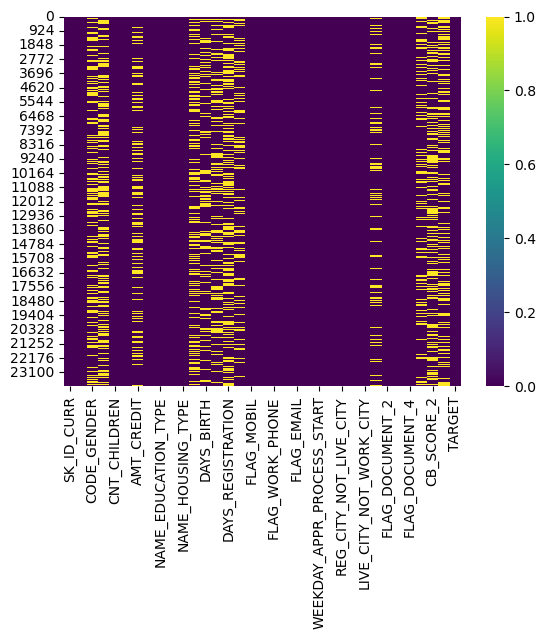

In [100]:
sns.heatmap(df_adj_mv.isnull(), cmap='viridis')
plt.show()

/var/folders/qt/6_4pdykd5k5bnlh72c2z4vvr0000gn/T/ipykernel_1447/3982764152.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_adj_mv.corr()


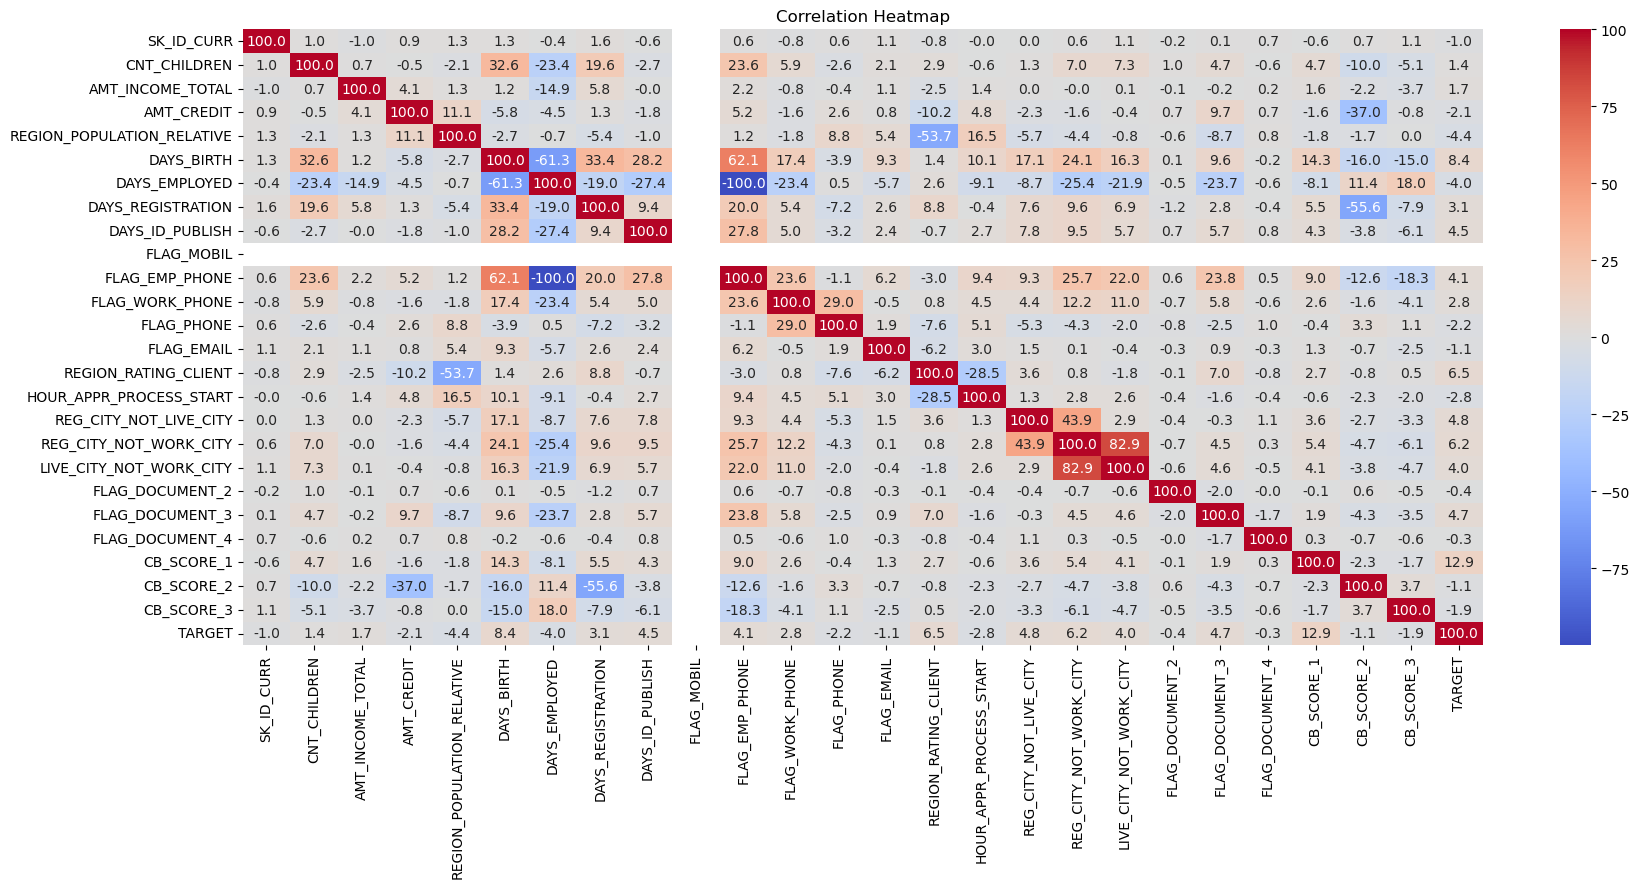

In [101]:
correlation_matrix = df_adj_mv.corr()
percent_corr_matrix = correlation_matrix * 100
# 히트맵 그리기
plt.figure(figsize=(20, 8))  # 그래프 크기 조정
sns.heatmap(percent_corr_matrix, annot=True,fmt=".1f", cmap='coolwarm', center=0)
plt.title("Correlation Heatmap")  # 그래프 제목
plt.show()

> #### FLAG_EMP_PHONE  == 0 일떄, DAYS_EMPLOYED 는 365243이라는 값을 만족함.
> #### 휴대폰 등록하지 않을때
> #### 365243을 무직으로 봐도 될 거 같음 값 변경 !!

FLAG_EMP_PHONE      int64
DAYS_EMPLOYED     float64
dtype: object

### 1.6 결측치 대체(추정통계량대체) <a id="s-1.6">

- #### 컬럼별 유효값들을 체크해서 결측치 대체 진행

- #### 결측치를 보이는 컬럼들과 각 컬럼별 결측치 처리를 아래와 같이 진행하고자 함  
<font color =red> 카테고리 형태의 컬럼들의 결측치는 최빈값, 그외 일반적인 숫자형은 중앙값으로 대체 _(일반적인 Missing Value Imputation 방법)_</font>  
__1. 성별(code_gender)__ : <font color =bluesky> 최빈값 </font>  
__2. 자가부동산보유여부(flag_own_realty)__ : <font color =bluesky>최빈값 </font>  
__3. 신용대출금액(amt_credit)__ : <font color =bluesky>중앙값 </font>   
__4. 결혼상태 (NAME_FAMILY_STATUS)__ : <font color =bluesky>최빈값 </font>   
__5. 거주 지역의 표준화된 인구(region_population_relative)__ : <font color =bluesky>중앙값 </font>  
__6. 대출 신청 시점에서의 일단위 나이(기준 시점 대비 상대적인 시간) (days_birth)__ : <font color =bluesky>중앙값 </font>  
__7. 대출 신청 시점에서의 고객의 근무일수(기준 시점 대비 상대적인 시간)(days_employed)__ :  <font color =bluesky>중앙값 </font>  
__8. 대출 신청 이전에 고객이 등록정보를 변경한 시점 사이의 일수(기준 시점 대비 상대적인 시간)(days_registration)__ : <font color =bluesky>중앙값 </font>  
__9. 대출 신청 이전에 고객이 신분증을 변경한 시점 사이의 일수(기준 시점 대비 상대적인 시간)(days_id_publish)__ : <font color =bluesky>중앙값 </font>   
__10. 근무회사 유형 (ORGANIZATION_TYPE)__ :  <font color =bluesky>최빈값 </font>  
__11. 신용점수1(cb_score_1)__ :<font color =bluesky> 중앙값</font>  
__12. 신용점수2(cb_score_2)__ :  <font color =bluesky>중앙값</font>  
__13. 신용점수3(cb_score_3)__ : <font color =bluesky>중앙값</font>  

- #### 결측치 처리 함수 구성

In [118]:
def replace_missing_values(df, col_fill_values):
    for col, fill_method in col_fill_values.items():
        if fill_method == 'mode':
            mode_result = stats.mode(df[col])
            fill_value = mode_result.mode[0]
           
        elif fill_method == 'median':
            fill_value = df[col].median()
       
        else:
            raise ValueError(f"Invalid method for column '{column}'.Choose either 'mode' or 'median'.")
           
        df[col] = df[col].fillna(fill_value)
    return df

- #### 결측치 처리 진행

In [120]:
fill_methods = {
    'CODE_GENDER': 'mode',
    'FLAG_OWN_REALTY' : 'mode',
    'AMT_CREDIT':'median',
    'NAME_FAMILY_STATUS': 'mode',
    'REGION_POPULATION_RELATIVE':'median',
    'DAYS_BIRTH':'median',
    'DAYS_EMPLOYED':'median',
    'DAYS_REGISTRATION':'median',
    'DAYS_ID_PUBLISH':'median',
    'ORGANIZATION_TYPE':'mode',
    'CB_SCORE_1':'median',
    'CB_SCORE_2':'median',
    'CB_SCORE_3':'median'
}

df_adj_mv2 = replace_missing_values(df_adj_mv,fill_methods)
df_adj_mv2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24000 entries, 0 to 23999
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   SK_ID_CURR                  24000 non-null  int64  
 1   NAME_CONTRACT_TYPE          24000 non-null  object 
 2   CODE_GENDER                 24000 non-null  object 
 3   FLAG_OWN_REALTY             24000 non-null  object 
 4   CNT_CHILDREN                24000 non-null  int64  
 5   AMT_INCOME_TOTAL            24000 non-null  float64
 6   AMT_CREDIT                  24000 non-null  float64
 7   NAME_INCOME_TYPE            24000 non-null  object 
 8   NAME_EDUCATION_TYPE         24000 non-null  object 
 9   NAME_FAMILY_STATUS          24000 non-null  object 
 10  NAME_HOUSING_TYPE           24000 non-null  object 
 11  REGION_POPULATION_RELATIVE  24000 non-null  float64
 12  DAYS_BIRTH                  24000 non-null  float64
 13  DAYS_EMPLOYED               240

/var/folders/qt/6_4pdykd5k5bnlh72c2z4vvr0000gn/T/ipykernel_1447/843028157.py:4: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_result = stats.mode(df[col])
/var/folders/qt/6_4pdykd5k5bnlh72c2z4vvr0000gn/T/ipykernel_1447/843028157.py:4: DeprecationWarning: Support for non-numeric arrays has been deprecated as of SciPy 1.9.0 and will be removed in 1.11.0. `pandas.DataFrame.mode` can be used instead, see https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mode.html.
  mode_result = stats.mode(df[col])


In [121]:
df_adj_mv2

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,REGION_RATING_CLIENT,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,CB_SCORE_1,CB_SCORE_2,CB_SCORE_3,TARGET
0,100002,Cash loans,M,Y,0,202500.0,510853.5,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461.0,-637.0,-3648.0,-2120.0,1,1,0,1,0,2,WEDNESDAY,10,0,0,0,Business Entity Type 3,0,1,0,49.894802,57.935604,58.349224,1
1,100004,Revolving loans,F,Y,0,67500.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.018850,-19046.0,-1206.0,-4260.0,-2531.0,1,1,1,1,0,2,MONDAY,9,0,0,0,Government,0,0,0,26.499494,57.600542,46.433666,0
2,100020,Cash loans,M,N,0,108000.0,509602.5,Working,Secondary / secondary special,Married,House / apartment,0.018634,-12931.0,-1206.0,-4521.0,-3866.0,1,1,0,0,0,2,THURSDAY,12,1,1,0,Government,0,1,0,49.894802,63.496369,59.971539,0
3,100029,Cash loans,M,N,2,135000.0,510853.5,Working,Secondary / secondary special,Married,House / apartment,0.026392,-11286.0,-746.0,-108.0,-3251.0,1,1,0,0,0,2,THURSDAY,14,0,1,1,Business Entity Type 3,0,1,0,82.376245,45.996152,68.694333,0
4,100048,Cash loans,F,Y,0,202500.0,604152.0,Working,Secondary / secondary special,Married,House / apartment,0.009175,-15731.0,-475.0,-4521.0,-513.0,1,1,0,1,0,2,MONDAY,12,0,1,1,Industry: type 1,0,1,0,66.199985,57.935604,59.971539,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23995,456095,Cash loans,F,Y,0,135000.0,510853.5,Pensioner,Higher education,Married,House / apartment,0.018850,-19105.0,365243.0,-4521.0,-2662.0,1,0,0,0,0,2,SUNDAY,10,0,0,0,Business Entity Type 3,0,1,0,55.568876,64.318198,56.609319,0
23996,456117,Cash loans,F,N,1,67500.0,490536.0,Working,Secondary / secondary special,Married,House / apartment,0.003813,-12183.0,-1206.0,-106.0,-3251.0,1,1,1,1,0,2,MONDAY,12,0,0,0,Business Entity Type 3,0,1,0,79.804871,57.935604,51.115667,0
23997,456118,Cash loans,M,Y,0,135000.0,995643.0,Working,Higher education,Married,House / apartment,0.018850,-15731.0,-1206.0,-4521.0,-4095.0,1,1,0,0,0,2,FRIDAY,14,0,0,0,Business Entity Type 3,0,1,0,40.231662,57.935604,51.533905,0
23998,456142,Cash loans,F,Y,1,360000.0,1417185.0,Working,Higher education,Single / not married,House / apartment,0.018029,-14010.0,-1206.0,-4521.0,-4796.0,1,1,1,0,0,3,FRIDAY,11,0,1,1,School,0,1,0,50.734878,57.935604,59.707773,0
